In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [29]:
iris = load_iris()
X = iris.data
y = iris.target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LogisticRegression()

In [39]:
param_distribution = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10, 20]
}

In [40]:
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_distribution, n_iter=10, cv=5, random_state=42)
randomized_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([    0.0001,     0.0003,     0.0007,     0.0018,     0.0048,
           0.0127,     0.0336,     0.0886,     0.2336,     0.6158,
           1.6238,     4.2813,    11.2884,    29.7635,    78.476 ,
         206.9138,   545.5595,  1438.4499,  3792.6902, 10000.    ]),
                                        'max_iter': [10, 20],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42)

In [41]:
best_model = randomized_cv.best_estimator_
print("Best Hyperparameters:")
print(randomized_cv.best_params_)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

Best Hyperparameters:
{'solver': 'saga', 'penalty': 'l1', 'max_iter': 10, 'C': 29.763514416313132}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Training Accuracy: 0.975


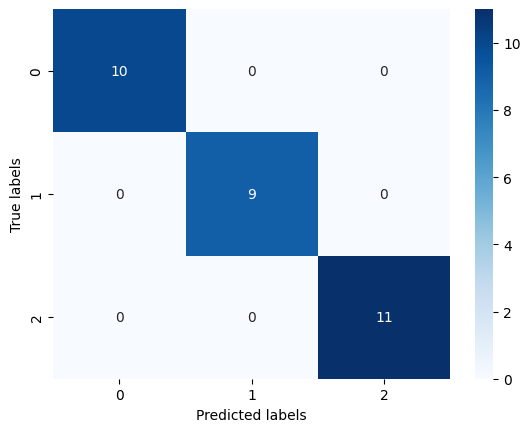

In [43]:
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print(f"Training Accuracy: {train_accuracy}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [44]:
proba = best_model.predict_proba(X_test)
print("Predicted Probabilities for Test Data:")
print(proba)

Predicted Probabilities for Test Data:
[[0.0143 0.6686 0.3171]
 [0.9564 0.0436 0.    ]
 [0.     0.0732 0.9267]
 [0.019  0.6305 0.3505]
 [0.0132 0.7399 0.2468]
 [0.9415 0.0585 0.0001]
 [0.1124 0.7616 0.126 ]
 [0.0047 0.4223 0.5729]
 [0.0064 0.5661 0.4275]
 [0.0552 0.7802 0.1646]
 [0.0061 0.4346 0.5593]
 [0.9196 0.0802 0.0002]
 [0.9666 0.0334 0.    ]
 [0.9184 0.0815 0.0002]
 [0.9665 0.0335 0.    ]
 [0.0252 0.6686 0.3062]
 [0.0004 0.1465 0.8531]
 [0.041  0.757  0.202 ]
 [0.0166 0.6023 0.381 ]
 [0.0005 0.1517 0.8478]
 [0.9109 0.0888 0.0003]
 [0.0067 0.4314 0.5619]
 [0.9282 0.0716 0.0002]
 [0.0005 0.171  0.8284]
 [0.0019 0.4478 0.5503]
 [0.0025 0.3179 0.6796]
 [0.0004 0.2066 0.7931]
 [0.0006 0.1726 0.8269]
 [0.9128 0.0869 0.0003]
 [0.8996 0.1001 0.0003]]


In [45]:
input = np.array([[1.5, 1.2, 3.0, 0.5]])
proba = best_model.predict_proba(input)
pred = best_model.predict(input)

print(f"Probabilities for Custom Input: {proba}")
print(f"Predicted Class for Custom Input: {pred}")

Probabilities for Custom Input: [[0.0036 0.1124 0.884 ]]
Predicted Class for Custom Input: [2]
